In [53]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from itertools import repeat
plt.style.use('classic')
%matplotlib inline

import seaborn as sns
sns.set()


In [35]:
tlhead=pd.read_csv('/Users/kristofcoddens/Downloads/M82726.csv',nrows=4, low_memory=False, error_bad_lines=False,compression='gzip')

In [36]:
tlhead.loc[:,tlhead.columns.str.contains('Iddq_D')]

,Iddq_Delta[1],Iddq_Delta[2],Iddq_Delta[3],Iddq_Delta[4],Iddq_Delta[5],Iddq_Delta[6],Iddq_Delta[7],Iddq_Delta[8],Iddq_Delta[9],Iddq_Delta[10],...,Iddq_Delta_Before[2],Iddq_Delta_Before[3],Iddq_Delta_Before[4],Iddq_Delta_Before[5],Iddq_Delta_Before[6],Iddq_Delta_Before[7],Iddq_Delta_Before[8],Iddq_Delta_Before[9],Iddq_Delta_Before[10],Iddq_Delta_Before_After
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.039640,0.049383,0.039454,0.043954,0.044016,0.031137,0.042144,0.043260,0.049668,0.071149
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.037783,0.023285,0.022145,0.025020,0.029022,0.025850,0.027622,0.036445,0.023148,0.034227
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.010908,0.007078,0.010474,0.013895,0.003458,0.014750,0.013858,-0.006185,0.025038,0.024555
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.038819,0.051850,0.071856,0.061121,0.063913,0.068778,0.073643,0.072749,0.062871,0.069101


In [54]:
tl=pd.read_csv('/Users/kristofcoddens/Downloads/M82726.csv',skiprows=[1,2,3], low_memory=False, error_bad_lines=False,compression='gzip')

In [38]:
tl.head()

,Lot,Wafer,Lot/Wf,Chip-Nr,Lot/Wf/Ch,X-Coord.,Y-Coord.,M-Datum,Device,M-Progr.,...,RamRom_Program_InIddqMode_vVdecSet,RamRam_Program_InIddqMode_vVdecSet,HVAS,Hvas_Vdec_Voltage,TempSensorSum_fw,DieTimeStamp$,DieTestTime_#1,Tester$,Bindescription$,HardBin
0,M82726,10,M82726/10,4,M82726/10/0004,84,-6,07.11.17 11:15:01,90360AAAE,PR35.005.07,...,NaN,NaN,-1.0,NaN,254.0,07-Nov-2017 08:11:19,1.27908,TEST0531,DutOkPass,1.0
1,M82726,10,M82726/10,5,M82726/10/0005,85,-7,07.11.17 11:15:01,90360AAAE,PR35.005.07,...,NaN,NaN,-1.0,NaN,255.0,07-Nov-2017 08:11:19,1.27908,TEST0531,DutOkPass,1.0
2,M82726,10,M82726/10,6,M82726/10/0006,84,-7,07.11.17 11:15:01,90360AAAE,PR35.005.07,...,NaN,NaN,-1.0,NaN,253.0,07-Nov-2017 08:11:19,1.27908,TEST0531,DutOkPass,1.0
3,M82726,10,M82726/10,7,M82726/10/0007,83,-6,07.11.17 11:15:01,90360AAAE,PR35.005.07,...,NaN,NaN,-1.0,NaN,254.0,07-Nov-2017 08:11:19,1.27908,TEST0531,DutOkPass,1.0
4,M82726,10,M82726/10,8,M82726/10/0008,82,-6,07.11.17 11:15:01,90360AAAE,PR35.005.07,...,NaN,NaN,-1.0,NaN,255.0,07-Nov-2017 08:11:19,1.27908,TEST0531,DutOkPass,1.0


In [55]:
iddqdf=tl[np.logical_and(tl['BIN']==1,tl['WAF']==9)]

In [56]:
tliddq=iddqdf.loc[:,tl.columns.str.contains('Iddq_Delta_Before')]
np.max(tliddq)

Iddq_Delta_Before[1]       0.062871
Iddq_Delta_Before[2]       0.095543
Iddq_Delta_Before[3]       0.117487
Iddq_Delta_Before[4]       0.138836
Iddq_Delta_Before[5]       0.145010
Iddq_Delta_Before[6]       0.068145
Iddq_Delta_Before[7]       0.071421
Iddq_Delta_Before[8]       0.099062
Iddq_Delta_Before[9]       0.157675
Iddq_Delta_Before[10]      0.063950
Iddq_Delta_Before_After    0.072128
dtype: float64

In [57]:
np.min(tliddq)

Iddq_Delta_Before[1]      -0.095381
Iddq_Delta_Before[2]      -0.089182
Iddq_Delta_Before[3]      -0.021383
Iddq_Delta_Before[4]      -0.021430
Iddq_Delta_Before[5]      -0.021212
Iddq_Delta_Before[6]      -0.027727
Iddq_Delta_Before[7]      -0.075965
Iddq_Delta_Before[8]      -0.024555
Iddq_Delta_Before[9]      -0.014994
Iddq_Delta_Before[10]     -0.102772
Iddq_Delta_Before_After   -0.037778
dtype: float64

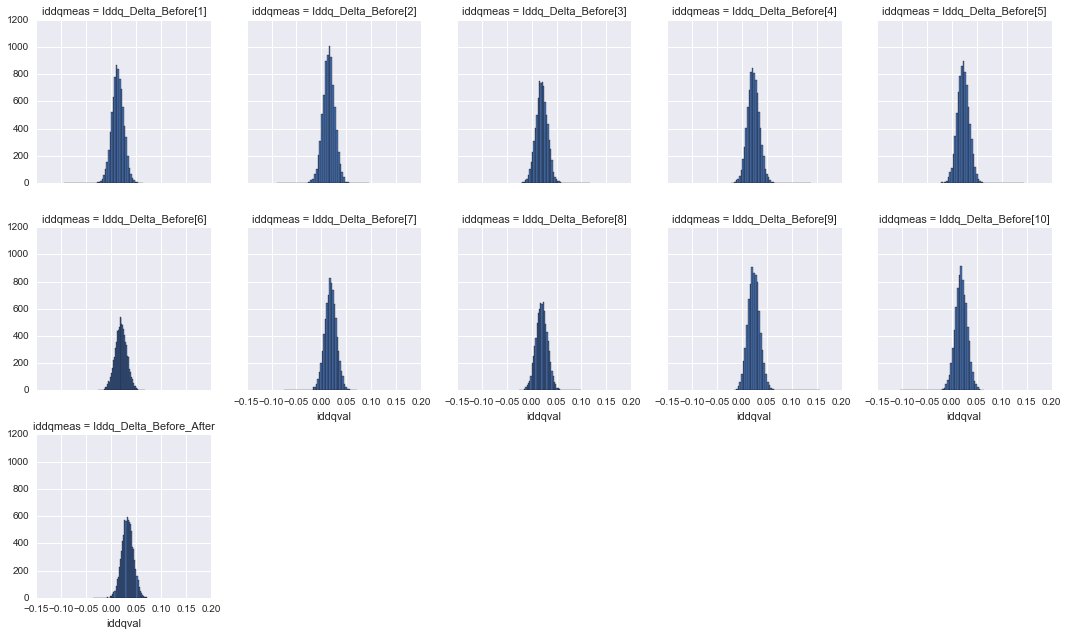

In [41]:
tliddq=pd.melt(tliddq,var_name='iddqmeas',value_name='iddqval')
g = sns.FacetGrid(tliddq, col='iddqmeas',col_wrap=5)
g.map(plt.hist,'iddqval',bins=50)

In [42]:
iddqdf=iddqdf[['XPos','YPos','Iddq_Delta_Before[1]']]

In [43]:
iddqdf.shape

(15647, 3)

In [44]:
iddqdf=iddqdf.dropna()

In [45]:
iddqdf.shape

(7872, 3)

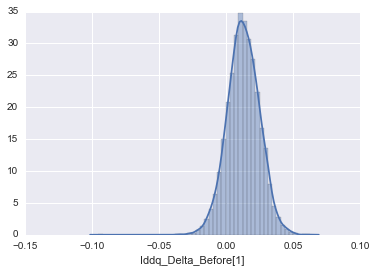

In [46]:
sns.distplot(iddqdf['Iddq_Delta_Before[1]'])

In [47]:
def nniddq(xn,yn,rad,df):
    dfc=df.copy()
    dfc['r']=np.sqrt((dfc['XPos']-xn)**2+(dfc['YPos']-yn)**2)
    dfc=dfc[dfc['r']<rad]
    dfc['iddqs']=scale(dfc['Iddq_Delta_Before[1]'])
    
    return(dfc.loc[dfc['r']==0,'iddqs'].values)

In [48]:
nniddq(78,49,5,iddqdf)

array([-0.28454342])

In [49]:
w=np.array(list(map(nniddq,iddqdf['XPos'],iddqdf['YPos'],repeat(5),repeat(iddqdf))))

In [50]:
w.shape

(7872, 1)

In [51]:
sum(w<(-2.5))

array([48])

In [52]:
sum(w>2.5)

array([50])